In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df=pd.read_csv('Employee.csv')

In [176]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [177]:
for i in df:
    print(len(df[i].unique()))

3
7
3
3
20
2
2
8
2


In [178]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [179]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [180]:
df['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [181]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [182]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [183]:
def f(i):
    print(len(df[i].value_counts()))

In [184]:
f('Age')

20


In [185]:
f('Gender')

2


In [186]:
f('ExperienceInCurrentDomain')

8


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [188]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [190]:
x=df.select_dtypes('object')

In [191]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in x:
    df[i]=encoder.fit_transform(df[i])

In [192]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int32
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int32
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int32
 6   EverBenched                4653 non-null   int32
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 254.6 KB


<AxesSubplot:>

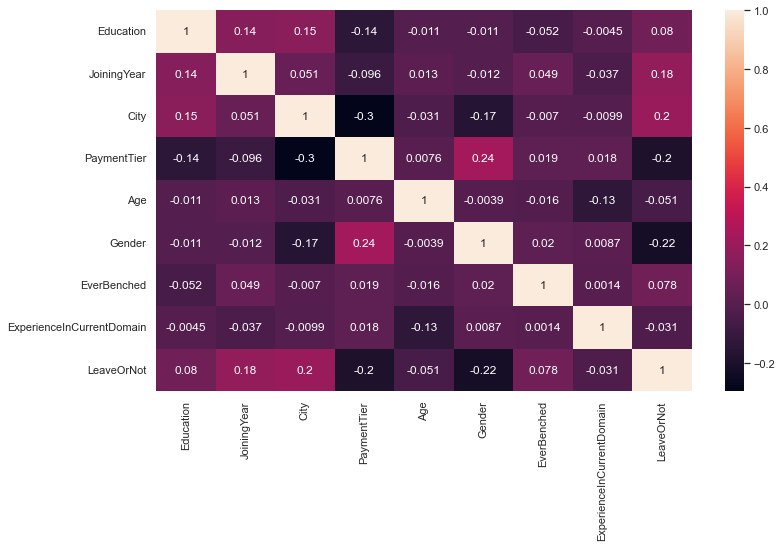

In [194]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(df.corr(),annot=True)

In [195]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [196]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

<AxesSubplot:xlabel='City'>

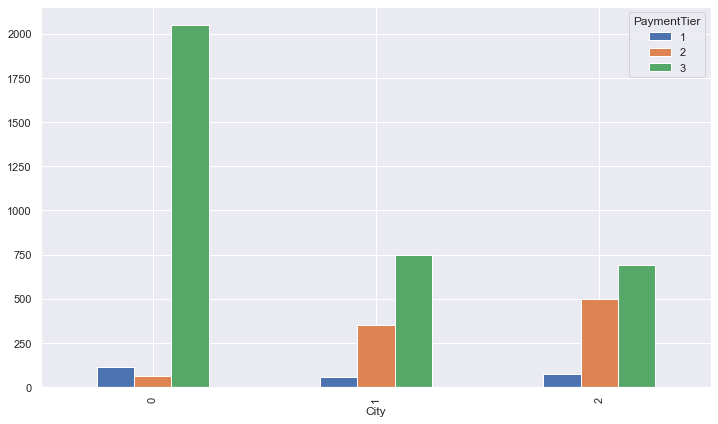

In [197]:
pd.crosstab(df['City'],df['PaymentTier']).plot.bar()

For city=1 or 2, it is skewed to the left, when city:0, the payment of 3 is so high

<AxesSubplot:xlabel='JoiningYear'>

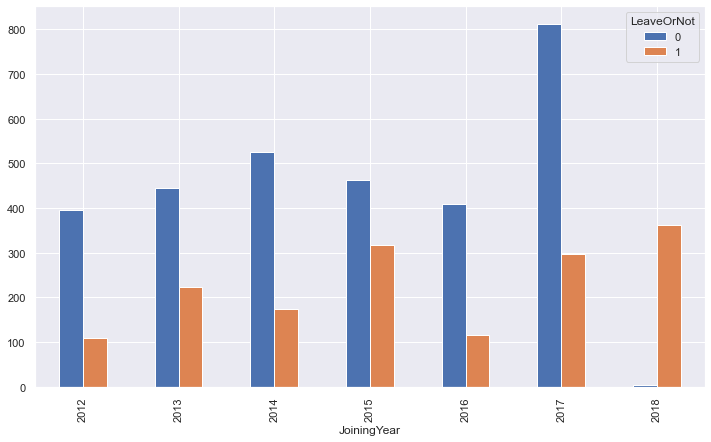

In [198]:
pd.crosstab(df['JoiningYear'],df['LeaveOrNot']).plot.bar()

The data is symetric ranging for the x-axis of 2012 to 2018. for most of th evalues, LeaveorNot is 0 rather than 1, but for 2018 the leave or not value has 1 as the greater value significantly.The whole distribution is symetric, but 2017 is an outlier

<AxesSubplot:xlabel='City'>

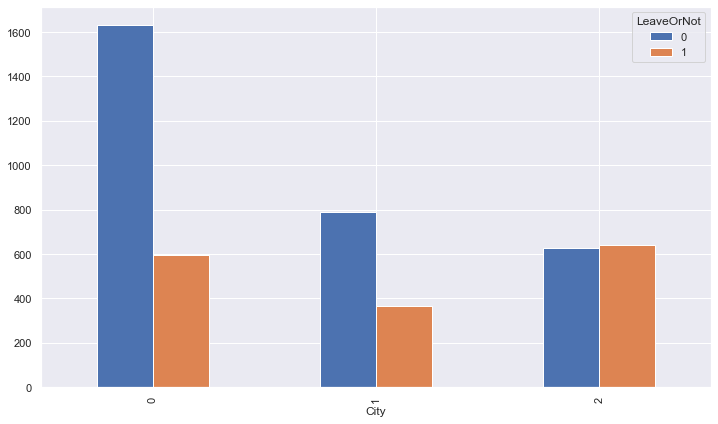

In [199]:
pd.crosstab(df['City'],df['LeaveOrNot']).plot.bar()

City ranges from 0-2.It is skwed to the right. As you go rtom 0 to 2, the proportion of values that have leave or not as 0 to leave or not as 1 is dicreasing. 

<AxesSubplot:xlabel='Gender'>

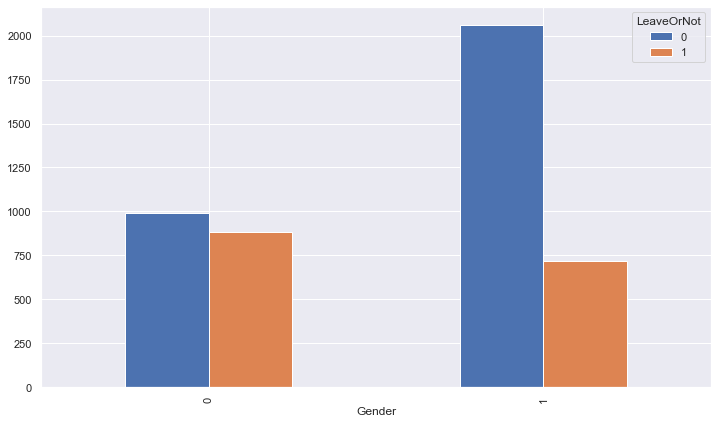

In [200]:
pd.crosstab(df['Gender'],df['LeaveOrNot']).plot.bar()

In [201]:
x=df.drop('LeaveOrNot',axis=1)
y=df['LeaveOrNot']

In [202]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

The males have an equal distribution of leaving and not leaving, while most of the females are not leaving while few females are leaving there jobs

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
log=LogisticRegression()
tree=DecisionTreeClassifier()
rdc=RandomForestClassifier()
log.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
rdc.fit(xtrain,ytrain)

RandomForestClassifier()

In [204]:
lists=['LogisitcRegression','DecisionTree','RandomForestClassifier']

In [205]:
score=[log.score(xtest,ytest),tree.score(xtest,ytest),rdc.score(xtest,ytest)]

In [206]:
list(zip(lists,score))[score.index(max(score))]

('RandomForestClassifier', 0.8206229860365198)

In [207]:
ypred=log.predict(xtest)

In [208]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
k=confusion_matrix(ypred,ytest)

In [209]:
precision=k[0][0]/(k[0][0]+k[0][1])

In [210]:
accuracy=rdc.score(xtest,ytest)

In [211]:
precision

0.7346666666666667

In [212]:
accuracy

0.8206229860365198

In [213]:
feature=rdc.feature_importances_

In [214]:
k=list(zip(x.columns,feature*100))

In [217]:
pd_df=pd.DataFrame(k)

In [220]:
pd_df.columns=['features','importances']

In [231]:
pd_df.reset_index(drop=True,inplace=True)

In [232]:
pd_df

,features,importances
0,Education,9.084643
1,JoiningYear,33.184802
2,City,11.388848
3,PaymentTier,10.260140
4,Age,16.162491
5,Gender,9.591799
6,EverBenched,1.988201
7,ExperienceInCurrentDomain,8.339076


In [235]:
pd_df.reset_index(drop=True)

,features,importances
0,Education,9.084643
1,JoiningYear,33.184802
2,City,11.388848
3,PaymentTier,10.260140
4,Age,16.162491
5,Gender,9.591799
6,EverBenched,1.988201
7,ExperienceInCurrentDomain,8.339076
